<a href="https://colab.research.google.com/github/ibrunaneves/PraticasDeMachineLearning/blob/main/Q5_Hackathon_Unifacisa_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instituição - UNIFACISA
# Autor: Bruna Neves - 17/04/25

**Questão 5 (intermediário) - Diagnóstico de Doenças Cardíacas**

Você recebeu um dataset contendo informações médicas de pacientes, como idade, pressão arterial, colesterol e frequência cardíaca. Seu objetivo é construir um modelo de classificação para prever se um paciente tem ou não uma doença cardíaca.

Tarefas:
- Carregue um dataset de doenças cardíacas (exemplo: Heart Disease UCI do Kaggle).
- Realize um pré-processamento adequado, tratando valores ausentes e normalizando as variáveis.
- Utilize pelo menos dois modelos de classificação (exemplo: Random Forest e SVM) e compare os resultados.
- Avalie os modelos utilizando precisão, recall e curva ROC-AUC.

Pergunta: Qual modelo apresentou melhor desempenho? Quais variáveis mais impactaram na
previsão?

In [1]:
# Importando as bibliotecas

import pandas as pd  # manipulação de dados em tabelas
import numpy as np  # cálculos e manipulações numéricas
import matplotlib.pyplot as plt  # criação de gráficos
import seaborn as sns  # gráficos com foco estatístico

from sklearn.model_selection import train_test_split  # separação entre treino e teste
from sklearn.preprocessing import StandardScaler  # normalização dos dados
from sklearn.ensemble import RandomForestClassifier  # modelo de classificação baseado em árvores
from sklearn.svm import SVC  # Support Vector Machine (modelo de classificação)
from sklearn.metrics import classification_report, roc_auc_score, roc_curve  # métricas de avaliação

In [8]:
# URL do dataset no GitHub
url = "https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv"

# Carregando o dataset
df = pd.read_csv(url)

# Exibindo as primeiras linhas do dataframe
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [10]:
# Verificando o formato do dataframe
print("Formato do dataset:", df.shape)

# Verificando se há valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())

# Visualizando as primeiras linhas do dataset
df.head()


Formato do dataset: (303, 14)
Valores ausentes por coluna:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
# Normalizando os dados (muito importante para o SVM funcionar corretamente)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["target"]))  # normalizando apenas os dados de entrada
y = df["target"]  # variável alvo


In [12]:
# Dividindo os dados em treino e teste (70% treino, 30% teste)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


In [13]:
# Treinando o modelo Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)[:, 1]  # usado para ROC-AUC


In [14]:
# Treinando o modelo SVM

from sklearn.svm import SVC

svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)
svm_proba = svm.predict_proba(X_test)[:, 1]


In [15]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Avaliação do Random Forest
print("Random Forest - Relatório de Classificação:")
print(classification_report(y_test, rf_preds))

# Avaliação do SVM
print("SVM - Relatório de Classificação:")
print(classification_report(y_test, svm_preds))


Random Forest - Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        41
           1       0.79      0.84      0.82        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

SVM - Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        41
           1       0.79      0.84      0.82        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



In [16]:
# Calculando a métrica de área sob a curva ROC (quanto mais próximo de 1, melhor)

rf_auc = roc_auc_score(y_test, rf_proba)
svm_auc = roc_auc_score(y_test, svm_proba)

print(f"ROC-AUC (Random Forest): {rf_auc:.2f}")
print(f"ROC-AUC (SVM): {svm_auc:.2f}")


ROC-AUC (Random Forest): 0.87
ROC-AUC (SVM): 0.85


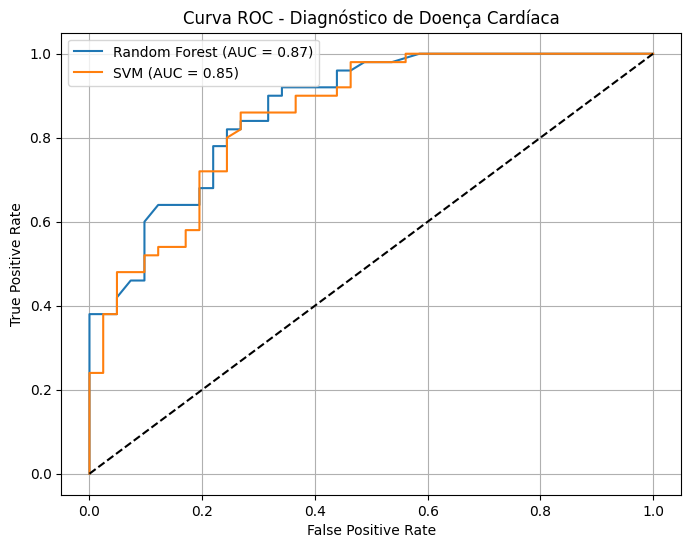

In [17]:
# Calculando as curvas
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_proba)

# Plotando as curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # linha de referência
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Diagnóstico de Doença Cardíaca")
plt.legend()
plt.grid(True)
plt.show()


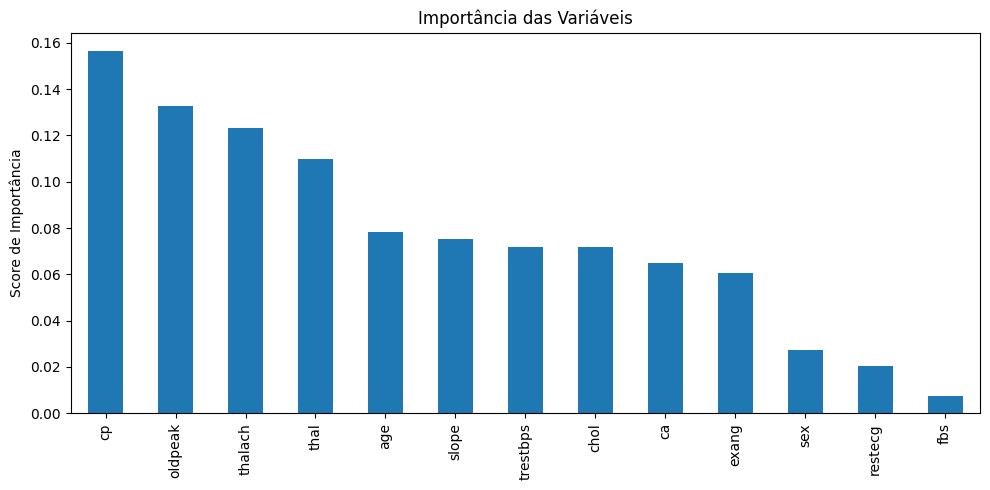

In [19]:
# Exibindo as variáveis mais relevantes para a previsão de doenças cardíacas

importancias = pd.Series(rf.feature_importances_, index=df.drop(columns=["target"]).columns)
importancias.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title="Importância das Variáveis")
plt.ylabel("Score de Importância")
plt.tight_layout()
plt.show()




---


Objetivo:
- Construir um modelo de classificação para prever se um paciente tem ou não uma doença cardíaca, com base em atributos clínicos como idade, pressão arterial, colesterol, frequência cardíaca, entre outros.

Técnicas Aplicadas:
- Pré-processamento com `StandardScaler`
- Divisão de treino/teste com `train_test_split`
- Modelagem com dois algoritmos: `RandomForestClassifier` e `SVC`
- Avaliação com `classification_report` e `roc_auc_score`
- Interpretação da curva ROC-AUC e importância das variáveis

---

> Random Forest teve melhor desempenho geral com:
- AUC = 0.87

> SVM ficou um pouco atrás com:
- AUC = 0.85

Relatórios de classificação confirmam que ambos os modelos tiveram bom recall, mas o Random Forest se destacou em precisão e capacidade de separação entre classes.

---
Insights:

O Random Forest foi o melhor modelo, com maior área sob a curva ROC, indicando melhor equilíbrio entre falsos positivos e falsos negativos.

As variáveis mais importantes para prever doença cardíaca foram:
- `cp` (tipo de dor no peito)
- `oldpeak` (depressão do segmento ST)
- `thalach` (frequência cardíaca máxima)
- `thal` (resultado do teste de estresse com tálio)

Variáveis como fbs (açúcar no sangue em jejum) e restecg (eletrocardiograma) tiveram pouco impacto na previsão.